
======= CalculatecalculateEveryFixedProbability =======

A probabilidade de x = 0, sabendo que y = 0 é: 0.5263157894736842
A probabilidade de y = 0, sabendo que x = 0 é: 0.25641025641025644

A probabilidade de x = 0, sabendo que y = 1 é: 0.2790697674418604
A probabilidade de y = 1, sabendo que x = 0 é: 0.30769230769230765

A probabilidade de x = 0, sabendo que y = 2 é: 0.4666666666666666
A probabilidade de y = 2, sabendo que x = 0 é: 0.358974358974359

A probabilidade de x = 0, sabendo que y = 3 é: 0.375
A probabilidade de y = 3, sabendo que x = 0 é: 0.07692307692307691

A probabilidade de x = 1, sabendo que y = 0 é: 0.2631578947368421
A probabilidade de y = 0, sabendo que x = 1 é: 0.18518518518518517

A probabilidade de x = 1, sabendo que y = 1 é: 0.34883720930232553
A probabilidade de y = 1, sabendo que x = 1 é: 0.5555555555555555

A probabilidade de x = 1, sabendo que y = 2 é: 0.19999999999999996
A probabilidade de y = 2, sabendo que x = 1 é: 0.2222222222222222

A probabilidade de 

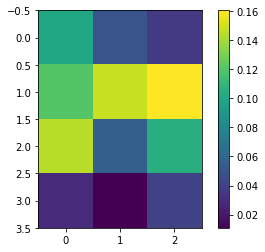


======= randomGuesses times for bigMatrix with 10000 generated numbers =======

Time for randomGuesses2: 0.38729214668273926
Time for randomGuesses3: 0.1903674602508545

======= Graph of randomGuesses3 with bigMatrix results =======



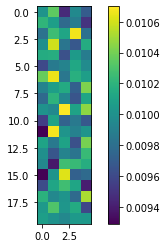

In [1]:
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt

distributedMatrix=[[0.1,0.05,0.04],
                    [0.12,0.15,0.16],
                    [0.14,0.06,0.1],
                    [0.03,0.01,0.04]]

bigMatrix=[[0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01],
            [0.01,0.01,0.01,0.01,0.01]]

nsamples = 10000
# Váriável Global para que todas as funções usem os mesmos números aleatoriamente gerados
guesses = np.random.sample(nsamples)
#============================================================================
def calculateMarginal(matrix):
    heigth = len(matrix)
    width = len(matrix[0])
    xMarginal = np.zeros(width)
    yMarginal = np.zeros(heigth)
    for y in range(heigth):
        for x in range(width):
            xMarginal[x] += matrix[y][x]
            yMarginal[y] += matrix[y][x]
# Esta verificação da um erro por causa de como o Python usa o Float
# Podendo retornar 0.99999999999999 mesmo com uma matriz correta
#     if (sum(xMarginal) != 1):
#         print("Erro! Probabilidades não somam 1")
    else:
        return (xMarginal, yMarginal)
#============================================================================
def getLimits(matrix, x, y):
    heigth = len(matrix)
    width = len(matrix[0])
    lowerLimit = 0
    higherLimit = 0
    for currentY in range(heigth):
        for currentX in range(width):
            higherLimit += matrix[currentY][currentX]
            if (currentX == x and currentY == y):
                return (lowerLimit, higherLimit)
            lowerLimit += matrix[currentY][currentX]
    return (lowerLimit, higherLimit)

# Probabilidade de um ponto especifico
def randomGuesses1(matrix, x, y):
    limits = getLimits(matrix,x,y)
    timesChoosen = 0
    for guess in guesses:
        if limits[0] <= guess and guess <= limits[1]:
            timesChoosen += 1
    return timesChoosen/nsamples
#============================================================================
def limitsList(matrix):
    heigth = len(matrix)
    width = len(matrix[0])
    lastLimit = 0
    limitList = []
    for y in range(heigth):
        for x in range(width):
            lastLimit += matrix[y][x]
            limitList.append(lastLimit)
    return limitList

# Geração de varíaveis aleatórias conjuntas
def randomGuesses2(matrix):
    heigth = len(matrix)
    width = len(matrix[0])
    startTime = time.time()
    limits = limitsList(matrix)
    numberOfElementsInMatrix = len(limits)
    timesChoosen = np.zeros(numberOfElementsInMatrix)
    for guess in guesses:
        for currentIndex in range(numberOfElementsInMatrix):
            if limits[currentIndex] >= guess:
                timesChoosen[currentIndex] += 1
                break
    eachPointProbability = []
    for point in timesChoosen:
        eachPointProbability.append(point/nsamples)
    print(f'Time for randomGuesses2: {time.time() - startTime}')
    a = np.asarray(eachPointProbability)
    return np.matrix(a.reshape(heigth,width))
#============================================================================
def calculateYMarginalLimits(matrix):
    heigth = len(matrix)
    width = len(matrix[0])
    marginals = calculateMarginal(matrix)
    lastLimit = 0
    marginalLimitList = []
    for i in range(heigth):
        marginalLimitList.append(lastLimit)
        lastLimit += marginals[1][i]
    marginalLimitList.append(lastLimit)
    return marginalLimitList

def calculateChoosenIndex(matrix, matrixMarginalLimitList, heigth, width, guess):
    for y in range(heigth):
        if matrixMarginalLimitList[y+1] >= guess:
            lastMarginalLimit = matrixMarginalLimitList[y]
            for x in range(width):
                lastMarginalLimit += matrix[y][x]
                if lastMarginalLimit >= guess:
                    return (width*y)+x

# Geração de varíaveis aleatórias conjuntas usando distribuição marginal
def randomGuesses3(matrix):
    startTime = time.time()
    heigth = len(matrix)
    width = len(matrix[0])
    numberOfElementsInMatrix = heigth*width
    marginalLimitList = calculateYMarginalLimits(matrix)
    timesChoosen = np.zeros(numberOfElementsInMatrix)
    for guess in guesses:
        timesChoosen[calculateChoosenIndex(matrix,marginalLimitList,heigth,width,guess)] += 1
    eachPointProbability = []
    for point in timesChoosen:
        eachPointProbability.append(point/nsamples)
    print(f'Time for randomGuesses3: {time.time() - startTime}')
    a = np.asarray(eachPointProbability)
    return np.matrix(a.reshape(heigth,width))
#============================================================================
# Cálculo da probabilidade de ser escolhido um y uma vez que um x já ter 
# sido escolhido ou vice-versa
def calculateFixedProbability(matrix, x, y, xFixed = True):
    marginals = calculateMarginal(matrix)
    if xFixed:
        return matrix[y][x]/marginals[0][x]
    else:
        return matrix[y][x]/marginals[1][y]

# Cálculo da probabilidade de ser escolhido um y uma vez que um x já ter 
# sido escolhido ou vice-versa para todos os pontos da matriz 
def calculateEveryFixedProbability(matrix):
    heigth = len(matrix)
    width = len(matrix[0])
    for x in range(width):
        for y in range(heigth):
            print(f'A probabilidade de x = {x}, sabendo que y = {y} é: {calculateFixedProbability(matrix,x,y, False)}')
            print(f'A probabilidade de y = {y}, sabendo que x = {x} é: {calculateFixedProbability(matrix,x,y)}\n')
            
#============================================================================
print('\n======= CalculatecalculateEveryFixedProbability =======\n')
calculateEveryFixedProbability(distributedMatrix)

print(f'\n======= randomGuesses1 with {nsamples} generated numbers =======\n')
print(f'randomGuesses1(a,1,0) => {randomGuesses1(distributedMatrix,1,0)}\n')

print(f'\n======= randomGuesses2 with {nsamples} generated numbers =======\n')
print(f'randomGuesses2(a):\n{randomGuesses2(distributedMatrix)}\n')

print(f'\n======= randomGuesses3 with {nsamples} generated numbers =======\n')
randomGuesses3Answer = randomGuesses3(distributedMatrix)
print(f'randomGuesses3(10000,a):\n{randomGuesses3Answer}\n')

print('\n======= Graph with randomGuesses3 results =======\n')
plt.imshow(randomGuesses3Answer)
plt.colorbar()
plt.show()

print(f'\n======= randomGuesses times for bigMatrix with {nsamples} generated numbers =======\n')
nsamples = 100000
guesses = np.random.sample(nsamples)
randomGuesses2(bigMatrix)
randomGuesses3Answer = randomGuesses3(bigMatrix)

print('\n======= Graph of randomGuesses3 with bigMatrix results =======\n')
plt.imshow(randomGuesses3Answer)
plt.colorbar()
plt.show()